In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()

In [5]:
iris_x,iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y = pd.get_dummies(iris_y).values
train_x,test_x,train_y,test_y = train_test_split(iris_x,iris_y,random_state=42,test_size=0.33)

In [7]:
numFeatures = train_x.shape[1]

print('numFeatures is: ', numFeatures)

numLabels = train_y.shape[1]

print('numLabels: ',numLabels)

numFeatures is:  4
numLabels:  3


In [8]:
train_x = tf.constant(train_x,dtype='float32')
test_x = tf.constant(test_x,dtype='float32')
train_y = tf.constant(train_y,dtype='float32')
test_y = tf.constant(test_y,dtype='float32')

In [9]:
w = tf.Variable(tf.zeros([4,3]))
b = tf.Variable(tf.zeros([3]))

In [10]:
w

<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [11]:
b

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [12]:
weight = tf.Variable(tf.random.normal([numFeatures,numLabels],mean=0,stddev=0.01,name='weights'),dtype='float32')
bias = tf.Variable(tf.random.normal([1,numLabels],mean=0,stddev=0.01,name='bias'))

In [13]:
def logistic_regression(x):
    apply_weights_op = tf.matmul(x,weight,name='apply_weights')
    add_bia_op = tf.add(apply_weights_op,bias,name='apply_bias')
    activation_sigmoid = tf.nn.sigmoid(add_bia_op,name='activation_sigmoid')

    return activation_sigmoid

In [14]:
numEpochs = 700

learningRate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0008,decay_steps=train_x.shape[0],decay_rate=0.95,staircase=True)

In [15]:
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
optimizer = tf.keras.optimizers.SGD(learningRate)

In [16]:
def accuracy(pred_y,true_y):
    correct_predict = tf.equal(tf.argmax(pred_y,1),tf.argmax(true_y,1))
    return tf.reduce_mean(tf.cast(correct_predict,tf.float32))

In [17]:
def run_optimization(x,y):
    with tf.GradientTape() as g:
        pred_logistc = logistic_regression(x)
        loss = loss_object(pred_logistc,y)
    gradiants=g.gradient(loss,[weight,bias])
    optimizer.apply_gradients(zip(gradiants,[weight,bias]))

In [18]:
display_step = 10
epochs_values=[]
accuracy_values=[]
loss_values=[]
loss=0
diff=1

for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in loss %g; convergence."%diff)
        break
    else:
        run_optimization(train_x,train_y)

        if i % display_step == 0:
            epochs_values.append(i)

            pred =logistic_regression(test_x)
            newLoss=loss_object(pred,test_y)
            loss_values.append(newLoss)
            acc = accuracy(pred,test_y)
            accuracy_values.append(acc)
            diff =abs(newLoss-loss)
            loss = newLoss
            print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))
print("final accuracy on test set: %s" %acc.numpy())

step 0, training accuracy 0.32, loss 0.134169, change in loss 0.134169
step 10, training accuracy 0.32, loss 0.133618, change in loss 0.000550419
step 20, training accuracy 0.32, loss 0.133076, change in loss 0.000541806
step 30, training accuracy 0.32, loss 0.132543, change in loss 0.000533283
step 40, training accuracy 0.32, loss 0.132018, change in loss 0.000524744
step 50, training accuracy 0.32, loss 0.131502, change in loss 0.000516325
step 60, training accuracy 0.32, loss 0.130994, change in loss 0.000507936
step 70, training accuracy 0.32, loss 0.130494, change in loss 0.000499621
step 80, training accuracy 0.32, loss 0.130003, change in loss 0.000491381
step 90, training accuracy 0.32, loss 0.12952, change in loss 0.0004832
step 100, training accuracy 0.32, loss 0.129049, change in loss 0.000470415
step 110, training accuracy 0.32, loss 0.128605, change in loss 0.000443995
step 120, training accuracy 0.32, loss 0.128169, change in loss 0.000436842
step 130, training accuracy 0

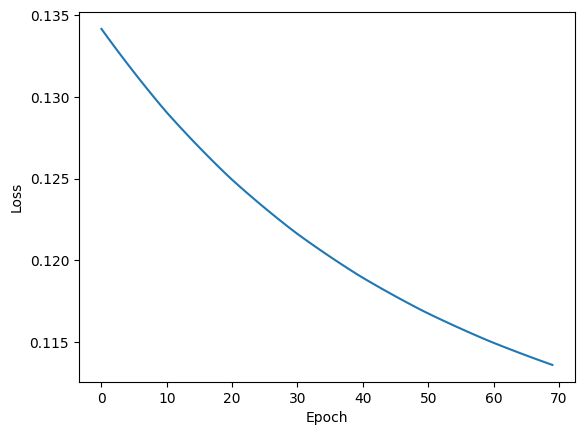

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values)
plt.show()